# Polkadot Analysis Using sklearn

## import packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import plotly.express as px
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

## load csv into pandas DataFrames

In [2]:
active_inactive = pd.read_csv("data/Daily Active Account & Newly Created Account.csv", parse_dates=['Date'])
bond = pd.read_csv("data/Daily Bond Value (DOT).csv", parse_dates=['Date'])
fees = pd.read_csv("data/Daily Fees Used.csv", parse_dates=['Date'])
circulating = pd.read_csv("data/Daily Native Token Circulating Supply（DOT）.csv", parse_dates=['Date'])
transactions = pd.read_csv("data/Daily Transaction Amount.csv", parse_dates=['Date'])
unbonding = pd.read_csv("data/Daily Unbonding Schedule (DOT).csv", parse_dates=['Date'])
price = pd.read_csv("data/DOT Price (USD).csv", parse_dates=['Date'])
treasury_available = pd.read_csv('data/Treasury Available Income.csv', parse_dates=['Date'])
treasury_expense = pd.read_csv('data/Treasury Expenses.csv', parse_dates=['Date'])

## rename columns

In [3]:
active_inactive = active_inactive.rename(columns={'Active Account': 'Active_account', 'New Account': 'New_account'})
bond = bond.rename(columns={'Value':'Bond_value'})
fees = fees.rename(columns={'DOT':'DOT_fees'})
transactions = transactions.rename(columns={'DOT':'DOT_transactions'})
unbonding = unbonding.rename(columns={'Value':'Unbonding_value'})
price = price.rename(columns={' Price (USD)': 'Price_USD'})
treasury_available = treasury_available.rename(columns={'Value': 'available_value'})
treasury_expense = treasury_expense.rename(columns={'Value': 'expense_value'})

## merge DataFrames, clean, create target

In [4]:
df = [price, transactions, fees, bond, unbonding, active_inactive, treasury_available, treasury_expense]
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['Date'], how='outer'), df)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              674 non-null    datetime64[ns]
 1   Price_USD         646 non-null    float64       
 2   DOT_transactions  646 non-null    float64       
 3   DOT_fees          646 non-null    float64       
 4   Bond_value        646 non-null    float64       
 5   Unbonding_value   674 non-null    float64       
 6   Active_account    646 non-null    float64       
 7   New_account       646 non-null    float64       
 8   available_value   646 non-null    float64       
 9   expense_value     646 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 57.9 KB


In [5]:
df_merged['Seven_day_price'] = df_merged['Price_USD'].shift(-2)
df_merged = df_merged.dropna()

In [6]:
# df_merged = df_merged[df_merged['Date'] > '2021-01-01']

## visual exploration

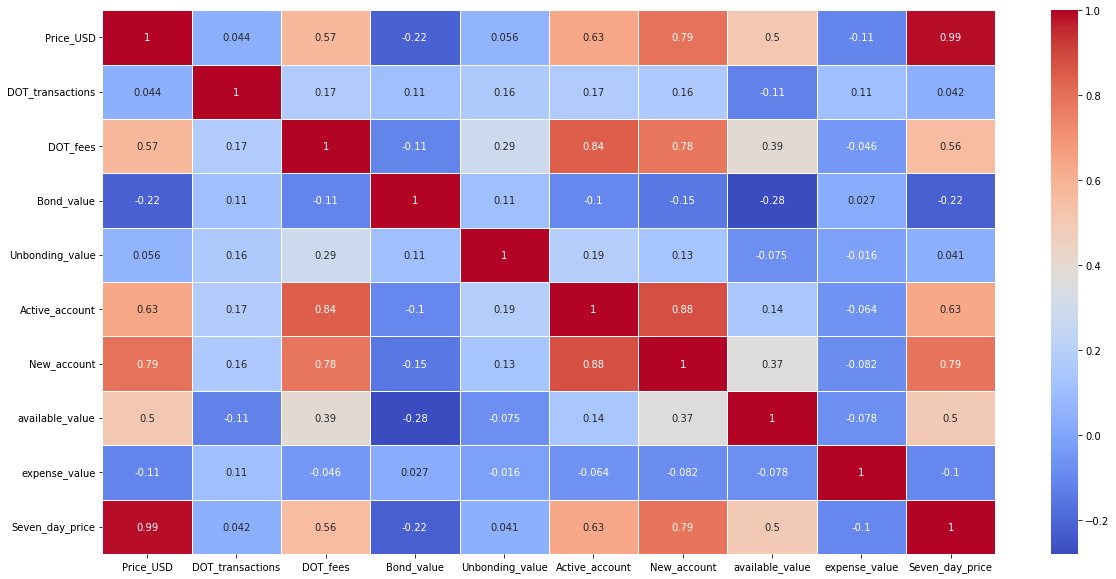

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_merged.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='w');

In [8]:
# practice using plotly for others

## fit linear model

In [9]:
X = df_merged.drop(columns=['Seven_day_price', 'Date'])
# X = df_merged['Price_USD']
y= df_merged['Seven_day_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regressor = LinearRegression().fit(X_train, y_train)
regressor.score(X_test, y_test)

0.9775089140266818

In [10]:
pred = regressor.predict(X)

In [11]:
df_merged['predicted'] = pred

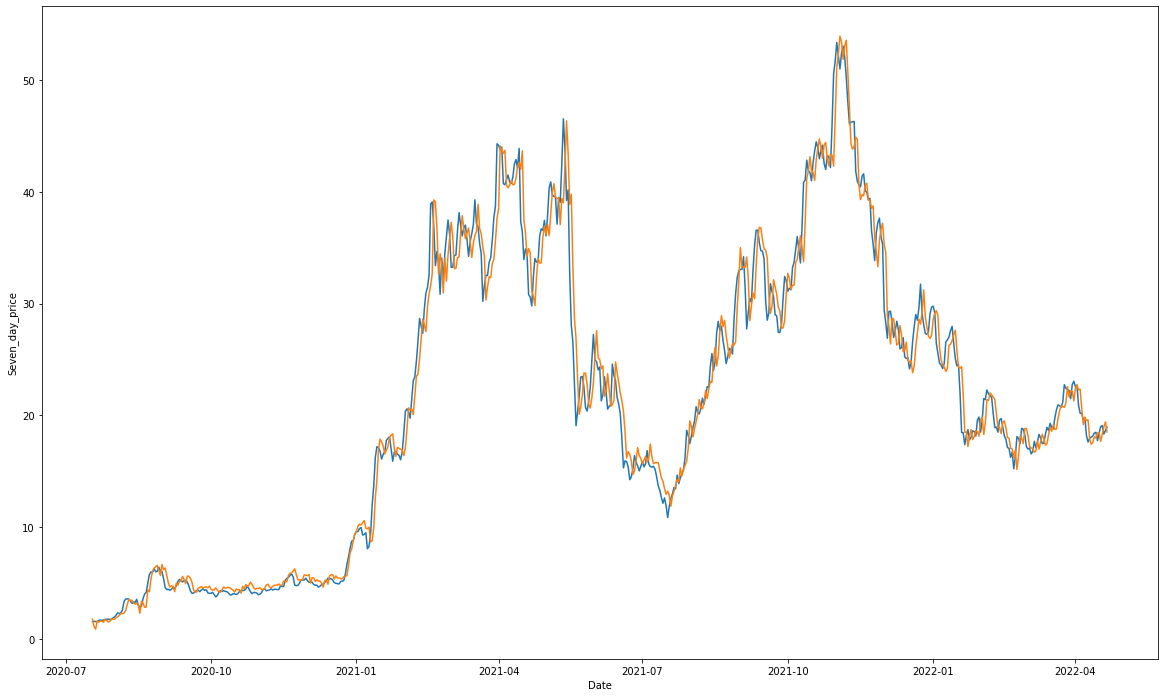

In [12]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Date', y='Seven_day_price', data=df_merged)
sns.lineplot(x='Date', y='predicted', data=df_merged);

In [13]:
difference = df_merged['predicted'] - df_merged['Seven_day_price']
display(difference[difference > 0].size)
display(difference[difference < 0].size)

353

290

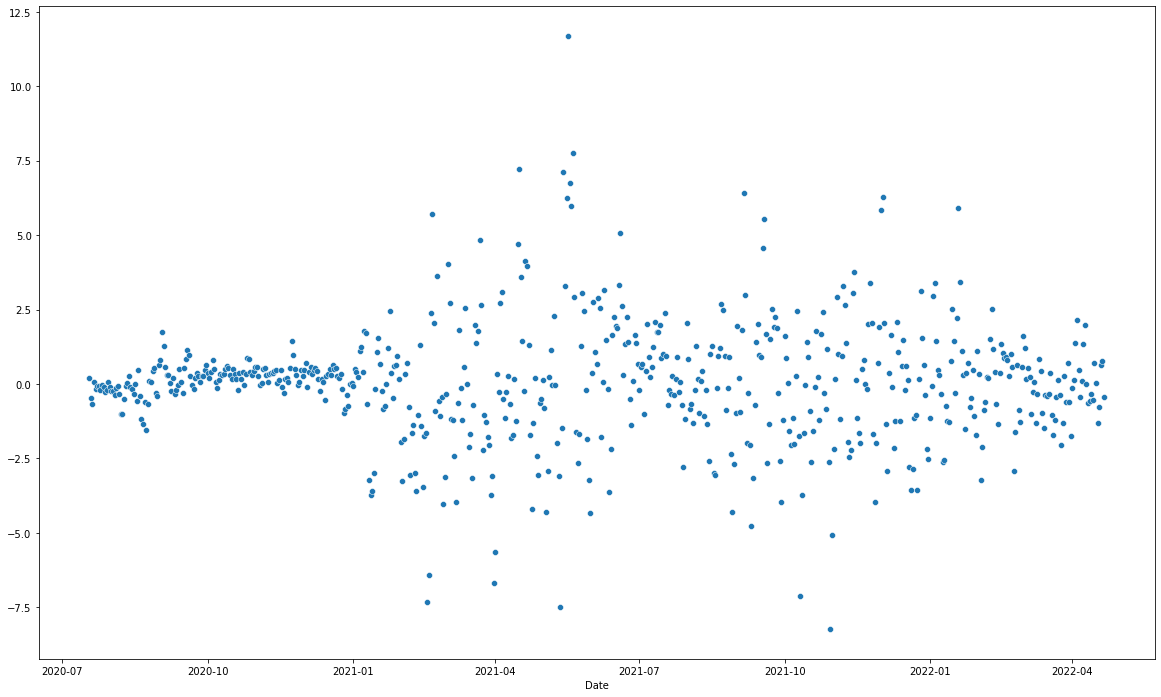

In [14]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=df_merged['Date'], y=difference);


In [15]:
X

,Price_USD,DOT_transactions,DOT_fees,Bond_value,Unbonding_value,Active_account,New_account,available_value,expense_value
1,1.750289,6.000000e+02,4.249300,3.225823e+05,49257.838569,197.0,30.0,0.000000e+00,0.0
2,1.605382,6.660000e+02,9.901400,2.009450e+07,274420.000000,395.0,21.0,0.000000e+00,0.0
3,1.571536,7.000000e+03,5.839100,2.922391e+07,18027.400000,286.0,30.0,0.000000e+00,0.0
4,1.588110,0.000000e+00,4.590900,1.489727e+05,25100.000000,173.0,18.0,0.000000e+00,0.0
5,1.570872,0.000000e+00,3.784200,2.527056e+06,800000.000000,169.0,11.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...
639,17.745579,2.022195e+06,161.702654,1.500104e+05,210595.650758,1782.0,2078.0,2.840731e+07,0.0
640,18.431622,3.634136e+06,162.303723,6.039939e+04,160314.831714,1680.0,1939.0,2.847764e+07,0.0
641,18.999490,1.810376e+07,154.528911,2.389070e+05,74234.646038,1581.0,1896.0,2.854775e+07,0.0
642,19.100654,2.963135e+07,160.432624,8.918039e+04,645972.093525,3551.0,3341.0,2.861856e+07,0.0


In [16]:
regressor.predict(np.array([17.679, 4116204.314, 166.166, 915036.22, 0, 3386, 2477, 28900972.482, 11132.28]).reshape(1, -1))

/home/inherentspice/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.89547071])